# LAPTOP ANALYSIS
## by Terri-Lee Meyer


## Investigation Overview

Laptops are made up of features that can be make or break it in the market. It is a great question if these specifications contribute greatly to the price and weight  of the laptop or determining the overall performance for the user.  The overall features of a laptop could in return affect each other - making a balance to be desired in order to find that goldilocks area in the perfect laptop for each category.There are a great number of specifications to consider when choosing a laptop. However, the focus on this presentation will be put of the categorisation of laptops, CPU speed, RAM size and screen type. 

## Dataset Overview

The dataset initially contained 1303 observations with 13 columns. There are 17 columns with 1043 observations after cleaning to make the dataset usable for my analysis. The feature columns crucial to this presentation include weight, price, CPU and GPU processors, RAM size, Screen Size and laptop category.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

%matplotlib inline

#libraries to help extract dataset from github
import requests
import io

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading the cleaned dataset from part 1 into a pandas dataframe
laptops = pd.read_csv('laptops-cleaned.csv')

#converting columns from objects to strings
string_columns = ['manufacturer', 
           'model_name', 
           'category', 
           'screen',
           'ram',
           'screen_size',
           'cpu_brand',
           'cpu_name',
           'storage', 
           'gpu_brand',
           'gpu_name', 
           'operating_system',
           'operating_system_version',
           'screen_type']
for column in string_columns:
    laptops[column] = laptops[column].astype('string')


In [3]:
#ordering data by the screen size
screen_size_ordered = laptops.copy()
#created a copy of screen_size column
screen_size_ordered['screen_size_num'] = screen_size_ordered['screen_size']
#remove all letters from new column
screen_size_ordered['screen_size_num'] = screen_size_ordered['screen_size_num'].str.replace('"', '')

#convert the screen_size_num column to integers
screen_size_ordered.screen_size_num = screen_size_ordered.screen_size_num.astype(float)

#order the dataframe according to the screen_size_num
screen_size_ordered.sort_values(by = 'screen_size_num', inplace = True, ascending = True)
#drop the new column since the screen size column will be ordered correctly 
screen_size_ordered.drop(columns = 'screen_size_num', inplace = True)

In [90]:
#functions used for visualisations

#set base color to lower chart junk
base_color = sns.color_palette()[0]

#you can customise the function further to implement more informations 
#e.g instead of having a set title size you can change it from plot to plot
def CountPlot(df_col_name, y, title, title_size, xlabel, ylabel, min, max, incr):
    #will help determines the order of bars by amount by ascending or descending/.
    order = df_col_name.value_counts().index
    count = df_col_name.value_counts()
    amt_sizes = count.sum()
    
    sns.countplot(data = laptops, y = y, color = base_color, order= order)
    plt.title(label = title, fontsize = title_size)
    plt.xlabel(xlabel = xlabel, fontsize = 10)
    plt.ylabel(ylabel = ylabel, fontsize = 10)
    plt.xticks(np.arange(min, max, incr))

    # Logic to print the proportion text on the bars
    for i in range(count.shape[0]):
        counting = count[i]
        # Convert count into a percentage, and then into string
        pct_string = '{:0.1f}%'.format(100*counting/amt_sizes)
        # Print the string value along each bar. 
        plt.text(counting + 1, i, pct_string, va='center');
        
#define new function that can be usede for future subplots
def SubPlots(list,figsize, rows, cols, index, df, df_col_name, x, hue, ncol, title, title_size, xlabel,xsize, ylabel, ysize):
    for cat in list:
        plt.figure(figsize = figsize)
        ax1 = plt.subplot(rows, cols, index)
        sns.countplot(data = df[df_col_name == cat], x = x, color = base_color)
        plt.title(label = title + ' For ' + cat + ' Laptops', fontsize = title_size)
        plt.xlabel(xlabel, fontsize = xsize)
        plt.ylabel(ylabel, fontsize = ysize);
        
#create new function to generate box plot for different variables
def BivariateBoxPlot(ymin, ymax, yincr, df, x, y, color, title, title_size, xlabel, xsize, ylabel, ysize):
    plt.yticks(np.arange(ymin, ymax, yincr))
    sns.boxplot(data = df, x = x, y = y, color = color)
    plt.title(label = title, fontsize = title_size)
    plt.xlabel(xlabel = xlabel, fontsize = xsize)
    plt.ylabel(ylabel = ylabel, fontsize = ysize);

#create new function to generate strip plot for different variables
def BivariateStripPlot(ymin, ymax, yincr, df, x, y, color, title, title_size, xlabel, xsize, ylabel, ysize):
    plt.yticks(np.arange(ymin, ymax, yincr))
    sns.stripplot(data = df, x = x, y = y, color = color)
    plt.title(label = title, fontsize = title_size)
    plt.xlabel(xlabel = xlabel, fontsize = xsize)
    plt.ylabel(ylabel = ylabel, fontsize = ysize);
    
#create new function for pointplots
def BivariatePointPlot(title, titlesize, df, x, y, color, xlabel,  xsize, ylabel, ysize):
    plt.title(label = title, fontsize = titlesize)
    sns.pointplot(data=df, x=x, y=y, color = color)
    plt.ylabel(xlabel, fontsize = xsize)
    plt.xlabel(ylabel, fontsize = ysize);
    
#create a multivariate pointplot function 
def MultivariatePointPlot(figsize, chart_title, title_size, df, x, y, hue, dodge, leg_title, min,max, incr, xlabel, ylabel, x_size,y_size):
    plt.figure(figsize = figsize)
    plt.title(label = chart_title, fontsize = title_size)
    ax = sns.pointplot(data = df, x = x, y = y, hue = hue,
                  dodge = dodge, linestyles = "")
    ax.legend(title = leg_title)
    plt.yticks(np.arange(min, max, incr))
    plt.xlabel(xlabel, fontsize = x_size)
    plt.ylabel(ylabel, fontsize = y_size);
    


## RAM Size:

RAM Size is an important quality in a laptop. RAM helps to keeps track of any apps running in the background and allows you quickly jump back to where you left off on each of them. Without enough RAM, your laptop will be slow to respond. Let's compare RAM sizes to their effect on price, weight and CPU speed and by extension how RAM sizes are distributed across laptop categories.

### RAM Size Effects on Price, Weight & CPU Speed:

There is more denstity for the lower prices given RAM sizes and there are slight increases in the minimum prices as the RAM increase. Not directly influential of the price as the price can still vary for each RAM size. The weight of a laptop is dependant on the size of the RAM. The higher the RAM, the higher the weight typically will be for the laptop. The RAM of a laptop works hand in hand with the CPU speed. They both help the laptop control processes at a faster rate if the RAM is higher. CPU Speeds are cautiously influenced by the RAM size. RAM sizes of 6GB and higher commonly have a CPU speed range of 1.5GHz to 3.0 GHz. 8GB RAM laptops can range from as low as 1GHz. 24GB and higher RAM sizes have CPU Speeds higher than 2.5GHz.


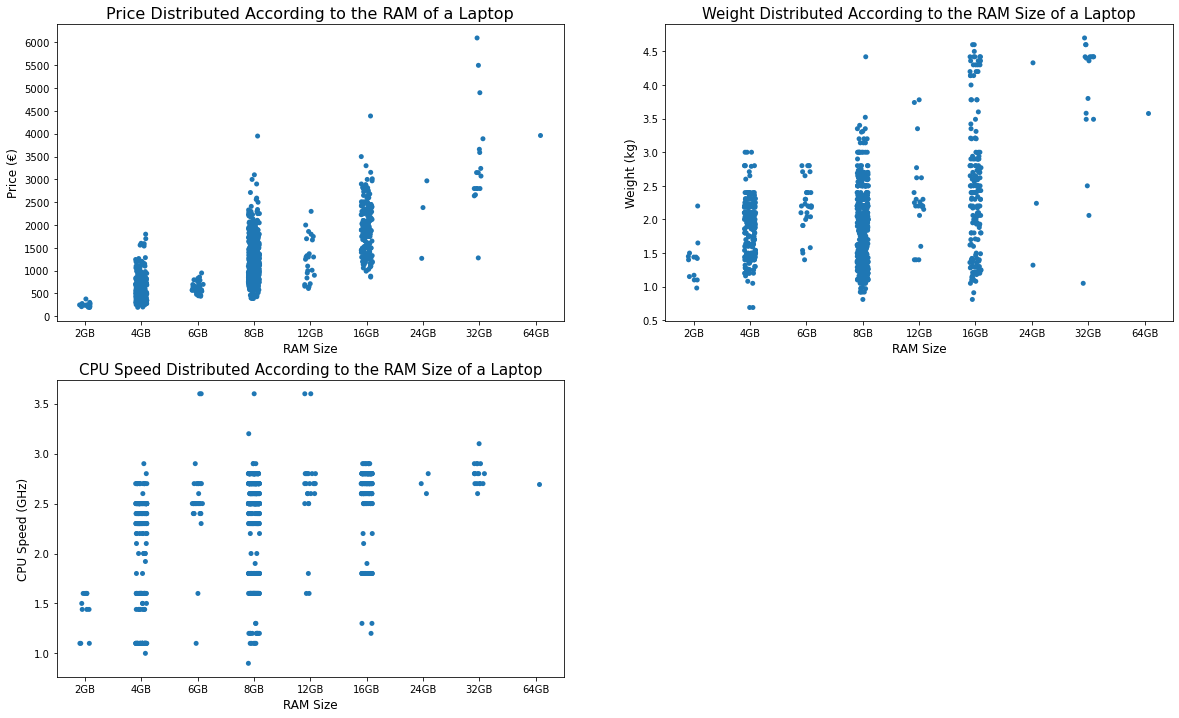

In [91]:
plt.figure(figsize = (20,12))

plt.subplot(221)
BivariateStripPlot(0, 
                 laptops.price.max() + 500, 
                 500, 
                 laptops, 
                 'ram', 
                 'price', 
                 base_color, 
                 'Price Distributed According to the RAM of a Laptop', 
                 16,
                 'RAM Size',
                 12,
                 'Price (€)',
                 12)
plt.subplot(222)
BivariateStripPlot(0, 
                 laptops.weight.max() +0.5, 
                 0.5, 
                 laptops, 
                 'ram', 
                 'weight', 
                 base_color, 
                 'Weight Distributed According to the RAM Size of a Laptop', 
                 15,
                 'RAM Size',
                 12,
                 'Weight (kg)',
                 12)

plt.subplot(223)
BivariateStripPlot(0, 
                 laptops.cpu_speed.max() +0.5, 
                 0.5, 
                 laptops, 
                 'ram', 
                 'cpu_speed', 
                 base_color, 
                 'CPU Speed Distributed According to the RAM Size of a Laptop', 
                 15,
                 'RAM Size',
                 12,
                 'CPU Speed (GHz)',
                12)



### RAM Size vs Laptop Category:

8GB is the preferable RAM size in all categories being the basis of any good laptop when choosing a RAM size. Gaming laptops are the only ones with 64GB RAM allowing the user more applications to run at the same time in live games for example. 

The most ideal RAM Size to use per Laptop Category
Notebooks: 8GB
Netbooks: 4GB
2 In 1 Convertibles: 8GB
Ultrabooks: 8GB
Gaming: 16GB
Workstation: 8GB

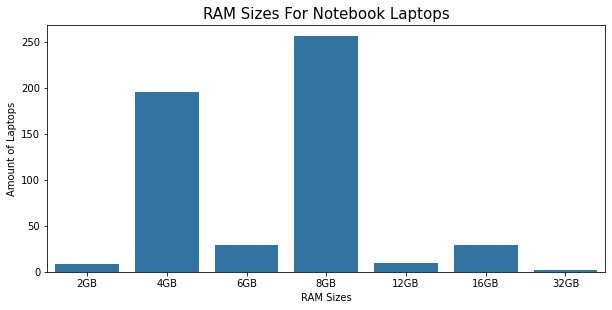

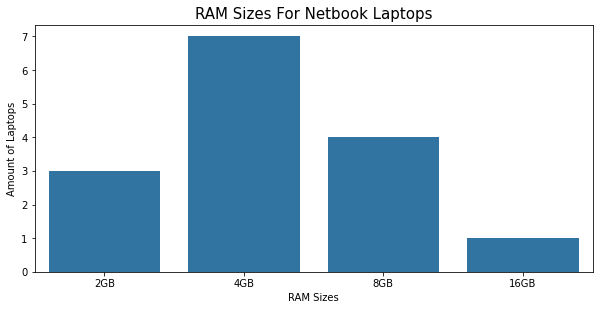

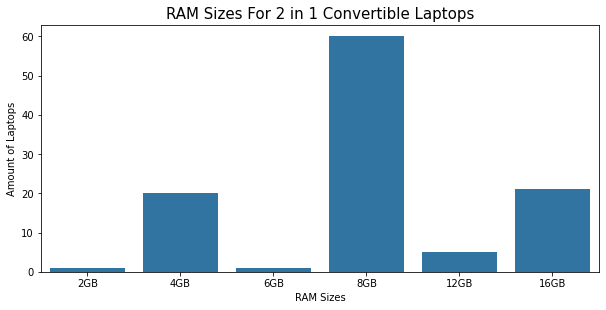

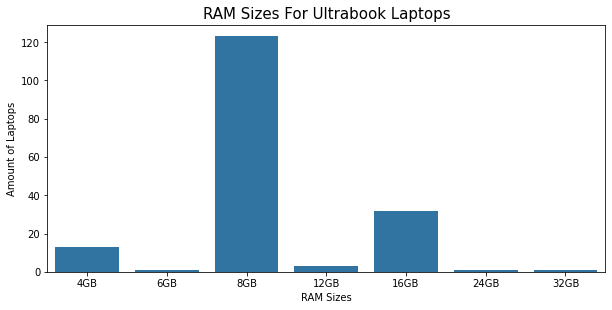

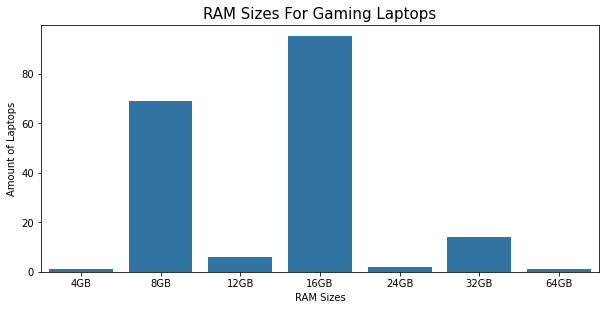

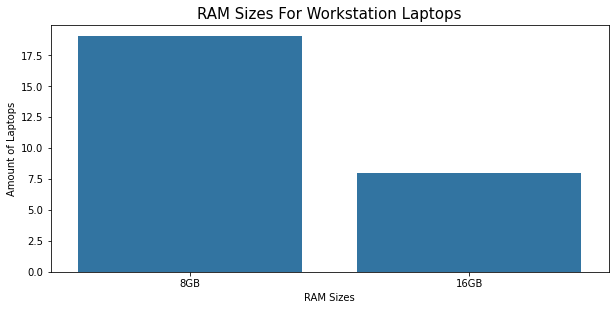

In [75]:
SubPlots(cats,
         (10,10), 
         2, 
         1,
         1, 
         laptops,
         laptops.category, 
         'ram', 
         'category', 
         1, 
         'RAM Sizes',
         15,
         'RAM Sizes',
         10,
         'Amount of Laptops',
         10)

## Screen Size:
Screen size is a preferential component to a laptop that will vary from user to user. Each type of laptop will accommodate the optimal screen size to fit the user's function in the category. 

### Screen Size vs Laptop Category:

Below presents count plots illustrating the distribution of screen sizes for each laptop category. Notebooks, 2 In 1 Convertibles and Ultrabooks have a wide variety of screen sizes. 

The most ideal Screen Size(s) to use per Laptop Category:
- Notebook: 15.6"
- Netbook: 11.6" and 12.5"
- 2 In 1 Convertible: 13.3"
- Ultrabook: 13.3" and 14.0"
- Gaming: 15.6" and 17.3"
- Workstation: 15.6"

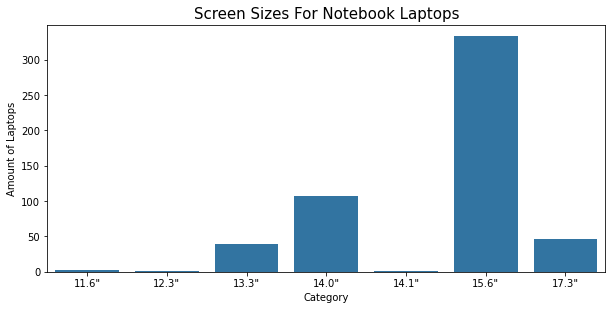

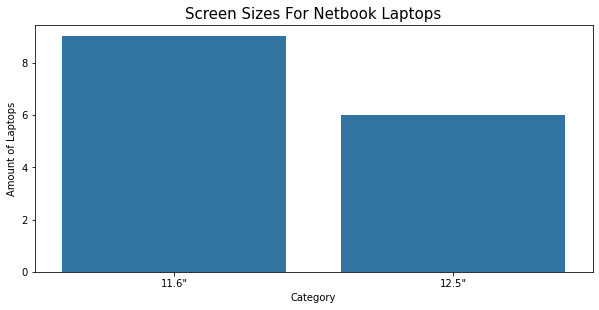

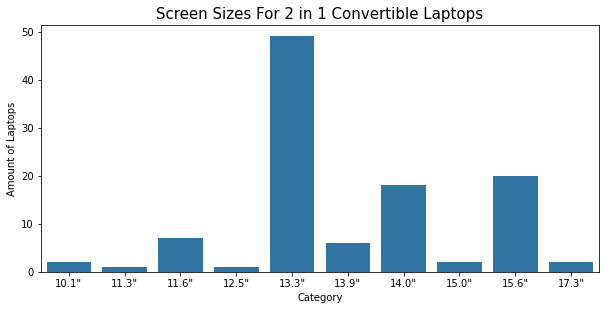

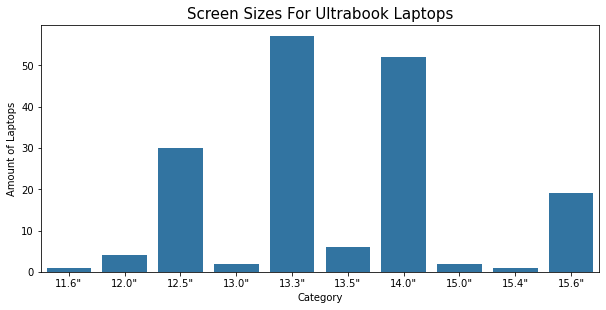

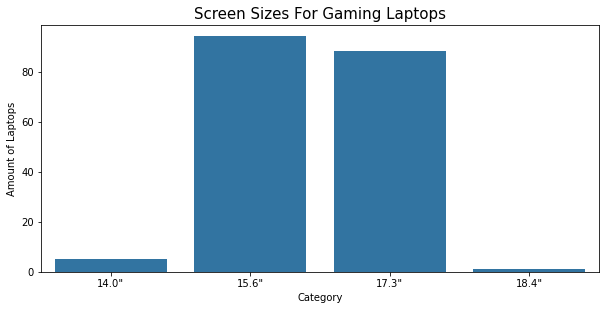

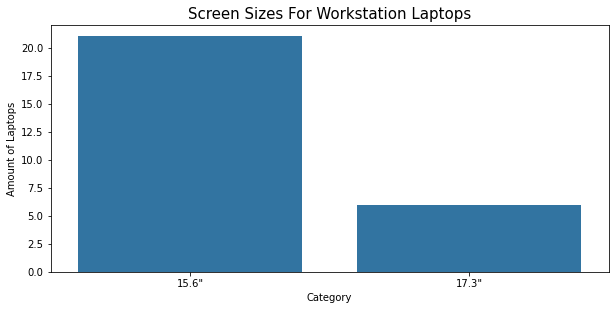

In [9]:
cats = ['Notebook', 'Netbook', '2 in 1 Convertible', 'Ultrabook', 'Gaming', 'Workstation']

SubPlots(cats,
         [10,10], 
         2, 
         1,
         1, 
         screen_size_ordered,
         screen_size_ordered.category, 
         'screen_size', 
         'category', 
         1, 
         'Screen Sizes',
         15,
         'Category',
         10,
         'Amount of Laptops',
         10)

### Screen Size vs Price:

Choosing the best screen size comes from the functionality of user of the laptop but let's see how it will affect the weight and price of the laptop too. There is an impact on both price weight similarly. Generally as the screen size increases, this will increase price and weight of a laptops with exceptions from 11.6", 12.3" and 14.1" laptops. 


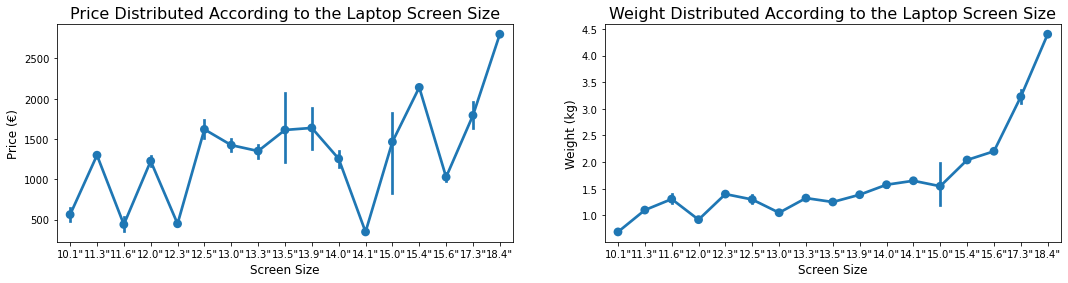

In [74]:

plt.figure(figsize = (18,4))
plt.subplot(121)
BivariatePointPlot(
          'Price Distributed According to the Laptop Screen Size', 
          16, 
          screen_size_ordered, 
          'screen_size', 
          'price', 
          base_color, 
          'Price (€)', 
          12, 
          'Screen Size', 
          12)

plt.subplot(122)
BivariatePointPlot( 
          'Weight Distributed According to the Laptop Screen Size', 
          16, 
          screen_size_ordered, 
          'screen_size', 
          'weight', 
          base_color, 
          'Weight (kg)', 
          12, 
          'Screen Size', 
          12)

### Laptop Category vs CPU Brand:

When looking at the best CPU for a laptop, comparing the laptop categories will bring a good sense on the brand you would be most ideal for the niche. AMD CPUs are only used in notebook and gaming laptops and are used in cheaper laptops than most Intel CPU laptops. In contrast Intel CPUs have the versality of being present in all categories.

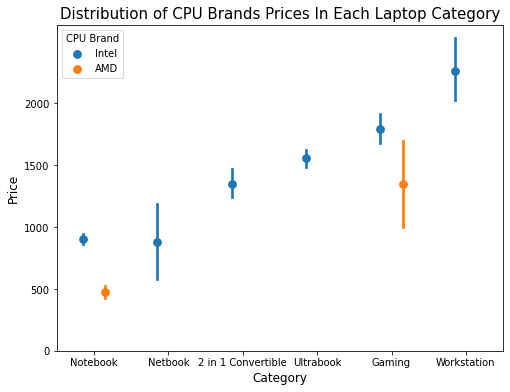

In [56]:
MultivariatePointPlot((8,6), 
                       'Distribution of CPU Brands Prices In Each Laptop Category',
                       15, 
                       laptops, 
                       'category', 
                       'price', 
                       'cpu_brand', 
                       0.3, 
                       'CPU Brand', 
                       0, 
                       laptops_df.price.max() + 500, 
                       500, 
                       'Category', 
                       'Price', 
                       12, 
                       12)

## Laptop Category:

It is interesting to see how the types of laptops are produced to fit a target market. One noteable distinguishment is that Notebooks dominate the market making up half of all laptops.

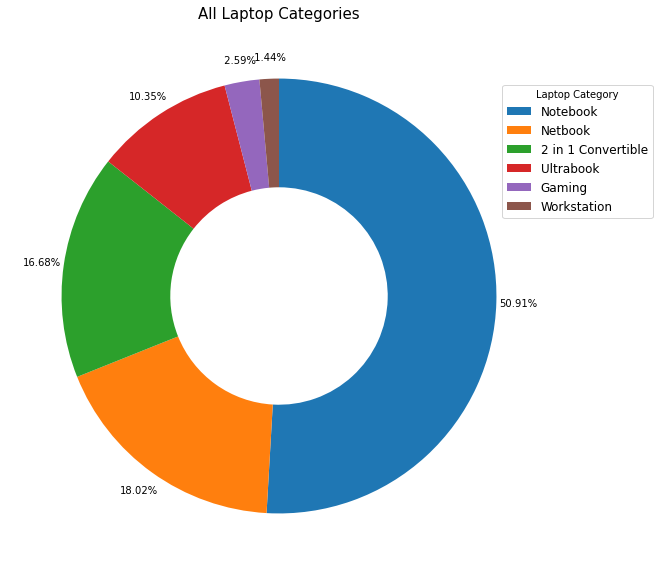

In [5]:
#create donut chart for laptop categories

donut_data = laptops.category.value_counts()
laptops.sort_values('category', ascending = False)
plt.figure(figsize=(12,10))
plt.pie(x = donut_data, pctdistance=1.1, autopct = '%5.2f%%', startangle = 90,counterclock = False, wedgeprops = {'width' : 0.5})
plt.legend(title = 'Laptop Category', labels = laptops.category.unique(), bbox_to_anchor=(0.9,0.9), fontsize = 12)
plt.title('All Laptop Categories', size = 15);

### Laptop Category vs Price:

Notebooks and Netbooks have similar prices ranges but Netbooks have a lower median - they will more likely have lower prices. Notebooks and 2 In 1 Convertibles vary greatly in prices. Notebook laptops lowest price is €196 and highest price is €4899. 2 In 1 Convertible laptops lowest price is €275 and highest price is €2824. All Netbooks are lower than €2000. Gaming and Workstation laptops are commonly priced higher than other categories with Gaming laptops contributing to the highest price with the Razer Brand laptop.

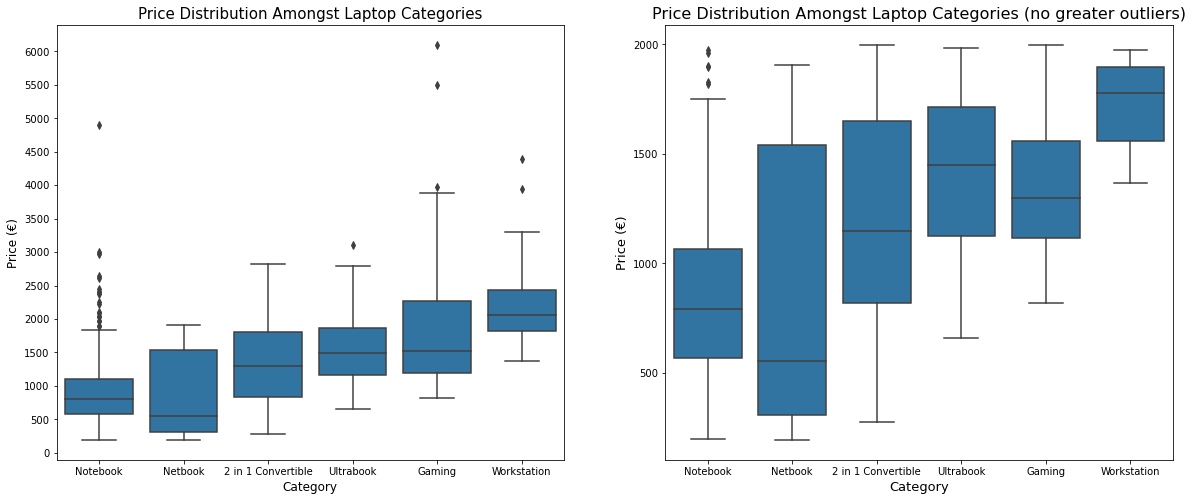

In [13]:
laptops_df = laptops[laptops.price <2000]
plt.figure(figsize = (20,8))
# subplot 1: boxplot of laptop category price distribution
plt.subplot(1, 2, 1)
BivariateBoxPlot(
                 0, 
                 6500, 
                 500, 
                 laptops, 
                 'category', 
                 'price', 
                 base_color, 
                 'Price Distribution Amongst Laptop Categories', 
                 15,
                 'Category',
                 12,
                 'Price (€)',
                 12)

# subplot 2: boxplot of laptop category price distribution without high priced laptop outliers
plt.subplot(1, 2, 2)
BivariateBoxPlot(
                 0, 
                 3000, 
                 500, 
                 laptops_df, 
                 'category', 
                 'price', 
                 base_color, 
                 'Price Distribution Amongst Laptop Categories (no greater outliers)', 
                 16,
                 'Category',
                 13,
                 'Price (€)',
                 13)

### Laptop Category vs Weight & CPU Speed:

It brings no surprise that Gaming laptops would have the highest weight given their need for bigger RAM size that should be at least 8GB but can be as high as 64GB. Ultrabooks, netbooks and 2 In 1 Convertibles should have weights lower than other laptops for their diverse features. Gaming and Workstation laptops tend to range at a higher speeds than the other categories. They range from 2GHz to 3.5GHz because it is best for both categories to be higher performing laptops. Gaming needs to have fast processing times to suit the user and Workstations are highly used for intense process such as 3D animation and video editing. Whereas the remaining categories can span between low and high usage that fit the users day to day processes that are not as intense. Ultrabooks, netbooks and 2 In 1 Convertibles also offer a range of lower processor speeds making certain laptops lower in functionality.

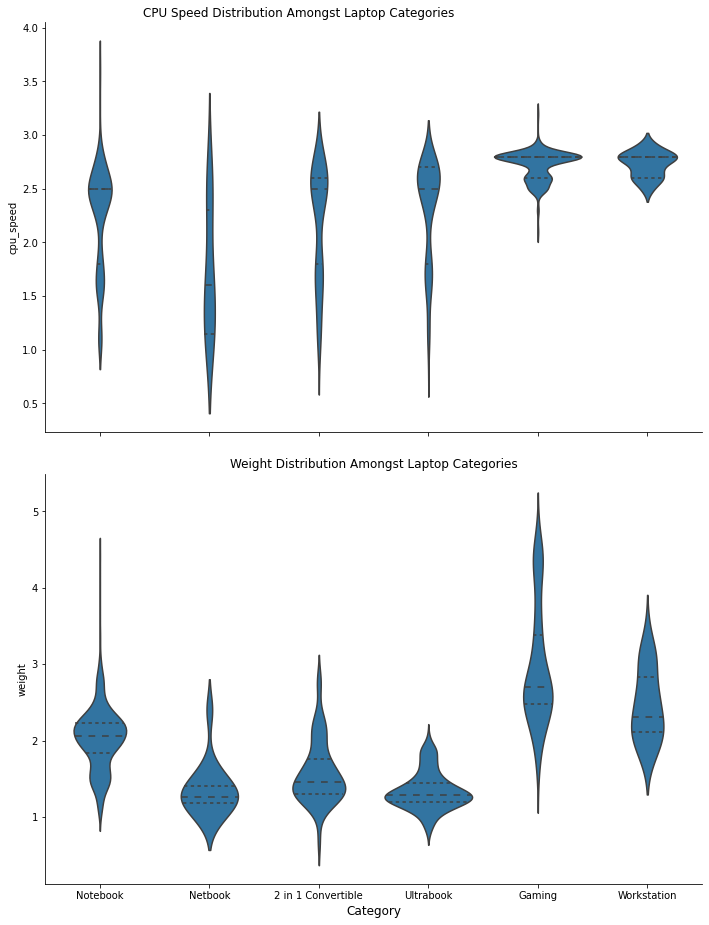

In [60]:
#plot pairgrid with cpu speed, weight and category columns

g = sns.PairGrid(data = laptops, y_vars = ['cpu_speed', 'weight'], x_vars = ['category'])
g.fig.suptitle('CPU Speed Distribution Amongst Laptop Categories')
plt.title('Weight Distribution Amongst Laptop Categories')
g.map(sns.violinplot, inner = 'quartile', color = base_color)
g.fig.set_size_inches(14,14)
plt.xlabel('Category', fontsize = 12);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt